In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [195]:
!git clone https://github.com/rodolfojbrandao/PhD
%cd PhD
DAT = pd.read_csv('QuedaLivre.csv')
teste = pd.read_csv('testerede2.csv')

Cloning into 'PhD'...
remote: Enumerating objects: 4238, done.
remote: Counting objects: 100% (4238/4238), done.
remote: Compressing objects: 100% (3865/3865), done.
remote: Total 4238 (delta 350), reused 4207 (delta 324), pack-reused 0
Receiving objects: 100% (4238/4238), 53.80 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (350/350), done.
Checking out files: 100% (4042/4042), done.
/content/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD/PhD


In [196]:
print(DAT)

     esfera  chapa  altura  restituicao
0        20     20       5       0.6856
1        20     20       5       0.6928
2        20     20       5       0.7071
3        20     20       5       0.7312
4        20     20       5       0.7446
5        20     20      10       0.7071
6        20     20      10       0.7128
7        20     20      10       0.7620
8        20     20      10       0.7128
9        20     20      10       0.7184
10       20     20      15       0.6762
11       20     20      15       0.6612
12       20     20      15       0.6612
13       20     20      15       0.6667
14       20     20      15       0.6927
15       20     20      20       0.6437
16       20     20      20       0.6042
17       20     20      20       0.6331
18       20     20      20       0.6564
19       20     20      20       0.6204
20       20     25       5       0.6659
21       20     25       5       0.6939
22       20     25       5       0.7005
23       20     25       5       0.7328


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5, hidden_layer_sizes=(i),random_state=j)
    return clf

In [0]:
Melhor=1e99
N=10 #i numero de neuronios
M=10 #j
O=10 #k

In [201]:
for k in range(0,O):
  # leitura dos dados
  DAT = pd.read_csv('QuedaLivre.csv')
  DAT.iloc[:,:]=DAT.iloc[:,:].apply(lambda x:x/1)

  # separa as colunas de interesse
  Index=[0,1,2,3]
  Dat_Select=[]
  Dat_Select=DAT.iloc[:,Index].copy()

  # separa os dados em normatizados e originais
  DAT_OLD=[]
  DAT_OLD=Dat_Select.copy()
  DAT=Normatiza(Dat_Select)
  
  # separa os dados em treino e teste
  train=[]
  test=[]
  train=DAT.sample(frac=0.8,random_state=k).copy()
  test=DAT.drop(train.index).copy()
  
  # obtem as variaveis independentes (treino e teste)
  x_train=train.iloc[:,[0,1,2]]
  x_test=test.iloc[:,[0,1,2]]
  X_OLD=DAT_OLD.iloc[:,[0,1,2]]

  # obtem as variaveis dependentes (treino e teste)
  Index=[3]
  y_train=train.iloc[:,Index]
  y_test=test.iloc[:,Index]
  Y_OLD=DAT_OLD.iloc[:,Index]
  test=Original(y_test,Y_OLD)
  resist_obs_test=[]
  resist_obs_train=[]
  resist_obs_test=test['restituicao'].copy()
  for i in range(1,N):
      for j in range(0,M):
          col_names=list(y_train)
          clf=rede(i,j)
          clf.fit(x_train, y_train)
          y_calc_train=[]
          y_calc_test=[]
          y_calc_train=clf.predict(x_train)
          y_calc_test=clf.predict(x_test)
          y_calc_train=pd.DataFrame(y_calc_train)
          y_calc_test=pd.DataFrame(y_calc_test)
          y_calc_train.columns = col_names
          y_calc_test.columns = col_names
          y_calc_train=Original(y_calc_train,Y_OLD)
          y_calc_test=Original(y_calc_test,Y_OLD)
          resist_calc_train=[]
          resist_calc_test=[]
          resist_calc_train=y_calc_train['restituicao'].copy()
          resist_calc_test=y_calc_test['restituicao'].copy()
          mse=mean_squared_error(resist_obs_test,resist_calc_test)
          R2_teste=r2_score(resist_obs_test,resist_calc_test)
          if(mse<Melhor):
              Melhor=mse.copy()
              ix=i
              jx=j
              R2r=R2_teste
              seed_sample = k
              resist_obs_train_top=Original(y_train,Y_OLD)
              resist_calc_train_top = resist_calc_train.copy()
              resist_obs_test_top = resist_obs_test.copy()
              resist_calc_test_top = resist_calc_test.copy()

mse=mean_squared_error(resist_obs_train_top,resist_calc_train_top)
R2=r2_score(resist_obs_train_top,resist_calc_train_top)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"Seed_sample",seed_sample,"MSE teste=",Melhor,"R^2 teste=",R2r,"MSE treino=",mse,"R^2 treino=",R2)


 Melhor resposta:
Neuronios= 3 Seed= 0 Seed_sample 7 MSE teste= 0.0017215976882363126 R^2 teste= 0.8707172040145551 MSE treino= 0.0019325334665119159 R^2 treino= 0.8356003340889154


In [0]:
resist_obs_train_top=pd.DataFrame(resist_obs_train_top)
resist_calc_train_top=pd.DataFrame(resist_calc_train_top)
resist_obs_test_top=pd.DataFrame(resist_obs_test_top)
resist_calc_test_top=pd.DataFrame(resist_calc_test_top)

In [204]:
print(resist_obs_train_top.head())
print(resist_calc_train_top.head())
print('====================================')
print(resist_obs_test_top.head())
print(resist_calc_test_top.head())

     restituicao
308       0.3469
13        0.6667
414       0.3547
32        0.6368
460       0.5311
   restituicao
0     0.442617
1     0.658220
2     0.363767
3     0.649208
4     0.497380
    restituicao
0        0.6856
4        0.7446
6        0.7128
10       0.6762
12       0.6612
   restituicao
0     0.745862
1     0.745862
2     0.696912
3     0.658220
4     0.658220


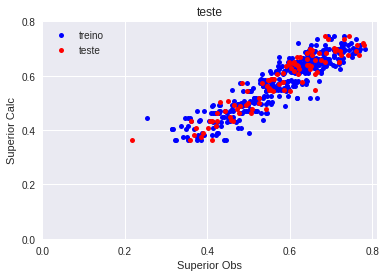

In [205]:
plt.plot(resist_obs_train_top, resist_calc_train_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='blue', markersize=5, label='treino') 
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.title('treino')
plt.xticks(np.arange(0, 1, 0.2))
plt.yticks(np.arange(0, 1, 0.2))
plt.plot(resist_obs_test_top, resist_calc_test_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='red', markersize=5, label='teste') 
plt.legend(loc='upper left')
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
plt.title('teste')
plt.legend()
plt.xticks(np.arange(0, 1, 0.2))
plt.yticks(np.arange(0, 1, 0.2))
plt.show()

In [206]:
i = 3
j = 7

DAT = pd.read_csv('QuedaLivre.csv')
DAT.iloc[:,:]=DAT.iloc[:,:].apply(lambda x:x/1)

# separa as colunas de interesse
Index=[0,1,2,3]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
  
# separa os dados em treino e teste
train=[]
test=[]
train=DAT.sample(frac=0.8,random_state=k).copy()
test=DAT.drop(train.index).copy()
  
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2]]
x_test=test.iloc[:,[0,1,2]]
X_OLD=DAT_OLD.iloc[:,[0,1,2]]

# obtem as variaveis dependentes (treino e teste)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
test=Original(y_test,Y_OLD)
resist_obs_test=[]
resist_obs_train=[]
resist_obs_test=test['restituicao'].copy()
col_names=list(y_train)
clf=rede(i,j)
clf.fit(x_train, y_train)
y_calc_train=[]
y_calc_test=[]
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
resist_calc_train=[]
resist_calc_test=[]
resist_calc_train=y_calc_train['restituicao'].copy()
resist_calc_test=y_calc_test['restituicao'].copy()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
R2_teste=r2_score(resist_obs_test,resist_calc_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:
teste = pd.read_csv('testerede2.csv')
print(teste)
y=clf.predict(teste)
print(y)

   esfera  chapa  altura
0     0.5    0.5     0.5
[0.18853218]
